In [26]:
DATA_DIR = '../data/facialRecon/images'
OUTPUT_DIR = '../dataset/facialRecon'

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image

In [28]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [29]:
import pandas as pd
# Emotion Categotu
dir_categories = {0: "Angry", 3: "Happy", 6: "Neutral", 4: "Sad", 5: "Surprise"}

def create_dataset(dir_categories):
    data = pd.DataFrame(columns=['emotion', 'image'])
    for emotion_label, emotion_name in dir_categories.items():
        emotion_folder = os.path.join(DATA_DIR, emotion_name)
        print(emotion_folder)
        if os.path.exists(emotion_folder):
            for image_file in os.listdir(emotion_folder):
                img_path = os.path.join(emotion_folder, image_file)
                with Image.open(img_path) as img:
                    image = img.resize((48, 48), Image.LANCZOS)
                    grey = np.array(image.convert('L')).flatten()
                    grey_str = ' '.join(map(str, grey))
                    #print(img_array.shape)
                    data = data.append({'emotion': emotion_label, 'image': grey_str}, ignore_index=True)
    return data

data = create_dataset(dir_categories)
# dataset = create_dataset(RESIZE_DIR, OUTPUT_DIR)
print(data.head())


../data/facialRecon/images\Angry
../data/facialRecon/images\Happy
../data/facialRecon/images\Neutral
../data/facialRecon/images\Sad
../data/facialRecon/images\Surprise
  emotion                                              image
0       0  103 103 104 103 103 103 104 104 104 104 104 10...
1       0  58 79 103 104 104 113 121 114 106 98 101 102 8...
2       0  122 120 118 115 112 109 101 85 66 49 42 43 51 ...
3       0  49 48 46 43 61 131 161 87 79 77 81 90 95 96 11...
4       0  28 30 29 27 28 38 57 82 90 100 111 122 129 132...


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14248 entries, 0 to 14247
Data columns (total 2 columns):
emotion    14248 non-null object
image      14248 non-null object
dtypes: object(2)
memory usage: 222.8+ KB


In [31]:
data.head()

,emotion,image
0,0,103 103 104 103 103 103 104 104 104 104 104 10...
1,0,58 79 103 104 104 113 121 114 106 98 101 102 8...
2,0,122 120 118 115 112 109 101 85 66 49 42 43 51 ...
3,0,49 48 46 43 61 131 161 87 79 77 81 90 95 96 11...
4,0,28 30 29 27 28 38 57 82 90 100 111 122 129 132...


In [32]:
data['emotion'].value_counts()

6    4027
4    3934
3    3740
0    1313
5    1234
Name: emotion, dtype: int64

In [33]:
emotions_count = data['emotion'].value_counts()
emotions_count.index = emotions_count.index.map(dir_categories)
emotions_count

Neutral     4027
Sad         3934
Happy       3740
Angry       1313
Surprise    1234
Name: emotion, dtype: int64

In [34]:
import matplotlib.pyplot as plt

def visualize_emotions(n=4):
    i = np.random.randint(0, data.shape[0], n)
    plt.figure(figsize=(15, 15))
    for j, idx in enumerate(i):
        plt.subplot(n//4+1, 4, j+1)
        img = np.array(data['image'][idx].split(' ')).astype('int').reshape(48, 48)
        plt.imshow(img, cmap='gray')
        plt.title(dir_categories[data.iloc[idx]['emotion']])
        plt.axis('off')

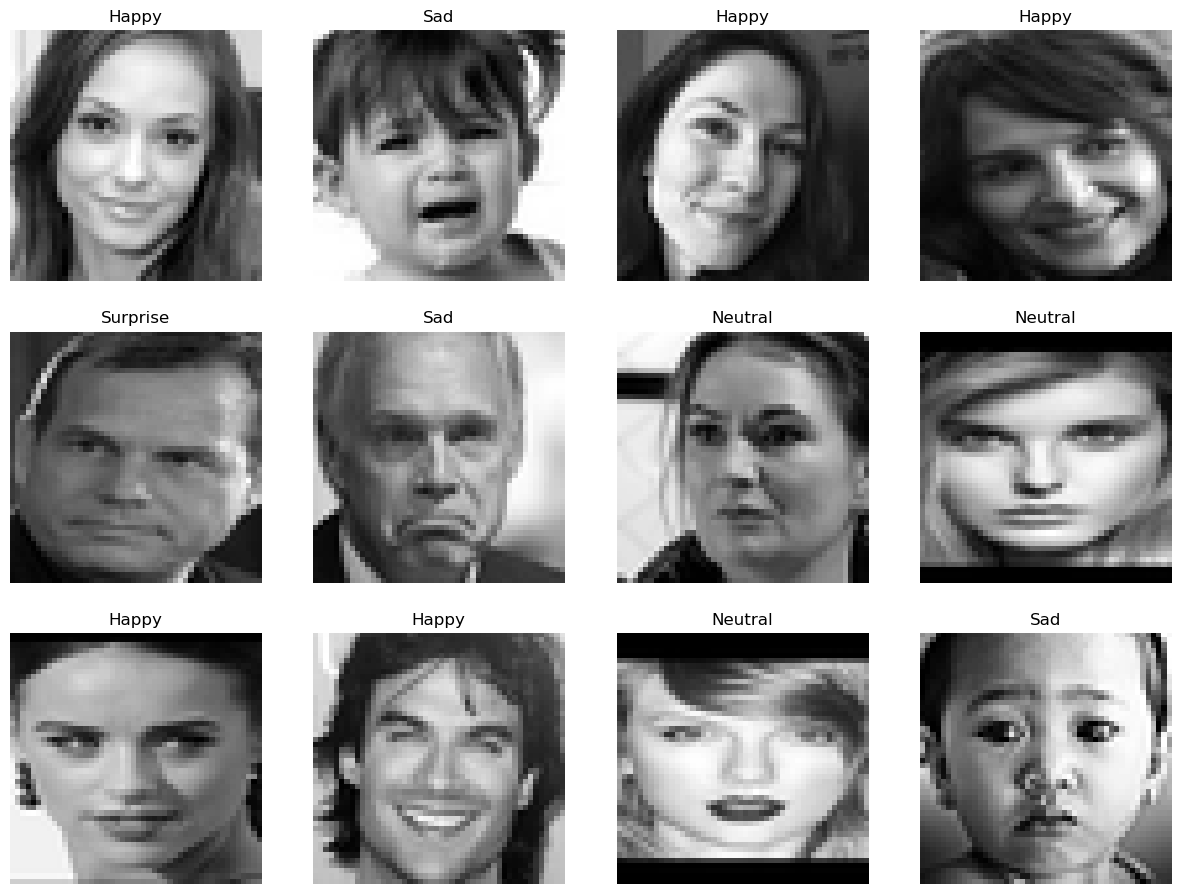

In [35]:
visualize_emotions(12)

In [36]:
def organize_data():
    train_dir = os.path.join(OUTPUT_DIR, 'train/')
    val_dir = os.path.join(OUTPUT_DIR, 'val/')
    test_dir = os.path.join(OUTPUT_DIR, 'test/')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # split data into train, val, test
    df = data.sample(frac=1).reset_index(drop=True)
    train_data = df[:int(0.7*data.shape[0])]
    val_data = df[int(0.7*data.shape[0]):int(0.85*data.shape[0])]
    test_data = df[int(0.85*data.shape[0]):]

    # save data
    train_data.to_csv(os.path.join(train_dir, 'train.csv'), index=False)
    val_data.to_csv(os.path.join(val_dir, 'val.csv'), index=False)
    test_data.to_csv(os.path.join(test_dir, 'test.csv'), index=False)

In [37]:
organize_data()